<a href="https://colab.research.google.com/github/GoPlusUltra/Bike-Sharing-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd   #Impoerting basic python libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import datetime as dt

In [2]:
from google.colab import drive     #Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin-1')    #Data location and creating a Data Frame.

Getting the gist of the data.

In [4]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


From Seeing this data, what questions can we ask??
1. How holidays are impacting to rent bike?
2. We have the 01/12/2017 to 30/11/2018 data on hourly basis. So how the daytime and night time impacting on our output?
We need to sum all hourly data and plot a graph.
3. What is season wise output??
4. How snowfall affecting our customers?
5. How Rainfall affecting our customers?
6. If there is less visibility then our count should go ideally down. We need to find what our data is showing us.
7. what our count on Functoning day and vice versa.
8. how temperature is affecting on our bike renting count?
9. We need HeatMap for finding the co relation between our variables. So that we can drop highly corelated variables at the time of applying machine regression algorithm.

We find each answer and will try to find trend.

So Lets Hop On..

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We are cool as we dont have any missing values. We are ready to go on quest then..

# First we will do **Exploratory Data Analysis**.

## Finding how the holidays are impacting on bike sharing count.

In [8]:
df.Holiday.value_counts()                #finding unique entries and their count

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [9]:
sns.set_style('darkgrid')               # Setting the background style.

Text(0.5, 6.79999999999999, 'Day Type')

<Figure size 1080x576 with 0 Axes>

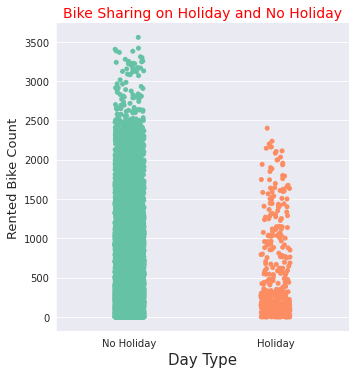

In [10]:
plt.figure(figsize=(15,8))
sns.catplot(x='Holiday',y='Rented Bike Count',data=df,palette='Set2')
plt.title('Bike Sharing on Holiday and No Holiday',color='r',fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=13)
plt.xlabel('Day Type',fontsize=15)

In [11]:
mean_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].mean()
print('mean demand of Bike Sharing on holiday is:',mean_count_on_daytype['Holiday'])
print('mean demand of Bike Sharing on no holiday is:',mean_count_on_daytype['No Holiday'])



mean demand of Bike Sharing on holiday is: 499.75694444444446
mean demand of Bike Sharing on no holiday is: 715.2280259365995


The bike sharing demand on Holiday is not as much as on No Holiday.  Thus we can see people dont use the bikes on holidays more often.

Also, The maximum count for No Holiday goes upto 3500. In case of Holiday which is around 2000.

The  demand of Bike on Holiday limits less than 500 as the area covered by dots on the plot is less.

## Lets find how much share of total rides are taken on No Holiday..

In [12]:
total_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].sum()
print('Total rides on Holidays are ',total_count_on_daytype['Holiday'])  
print('Total rides on No Holidays are ',total_count_on_daytype['No Holiday'])

Total rides on Holidays are  215895
Total rides on No Holidays are  5956419


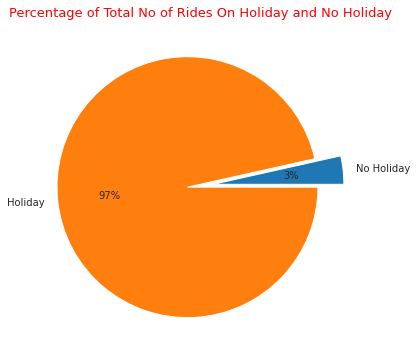

In [13]:
plt.figure(figsize=(6,6))
explode=(.1,.1)
labels="No Holiday","Holiday"
plt.pie(total_count_on_daytype, autopct='%.0f%%',explode=explode,labels=labels)
plt.title('Percentage of Total No of Rides On Holiday and No Holiday',color='r', fontsize=13)
plt.rcParams.update({'font.size': 15})

We can see the 97% of the rides from  01/12/2017 to 30/11/2018 are taken on Holiday.

## How the demand of the bikes shows variation on different hours of the day time?

In [14]:
hourly_analysis = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
hourly_analysis.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


Text(0.5, 1.0, 'Rented Bike Analysis by Hour')

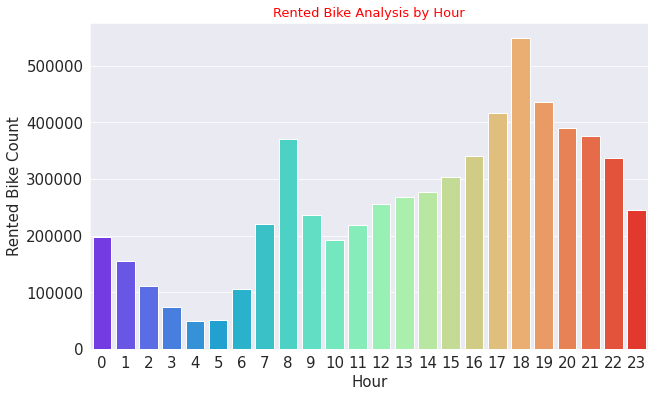

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=hourly_analysis,palette='rainbow')
plt.title('Rented Bike Analysis by Hour',color='r', fontsize=13)


As we can see demand for bikes decreases at night drastically and increases gradually from Hour 6.

## Bike Rental insights from each season

In [16]:
season_wise_analysis=df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
season_wise_analysis

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


Text(0.5, 1.0, 'Seasonwise Bike Rental Counts')

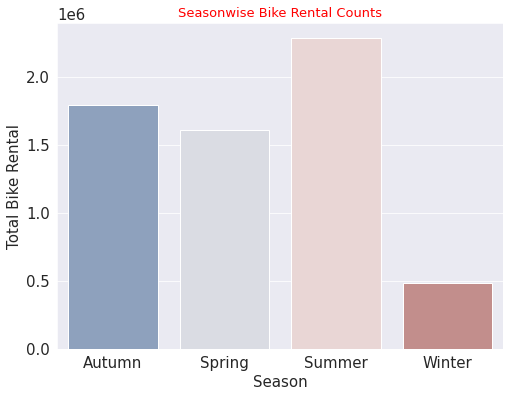

In [17]:
plt.figure(figsize=(8,6))
plot=sns.barplot(x='Seasons',y='Rented Bike Count',data=season_wise_analysis,palette='vlag')
plt.xlabel('Season')
plt.ylabel('Total Bike Rental')
plt.title('Seasonwise Bike Rental Counts',color='r', fontsize=13)

We can see that demand in winter is too less than other Seasons. Cause obvious resaon is people prefer Cars to avoid cold.

## Effect of Snowfall and Rainfall on Bike Rental.

In [18]:
snowfall_analysis=df.groupby(['Snowfall (cm)'])['Rented Bike Count'].sum().reset_index()
snowfall_analysis.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


As we are expecting, **Bike Rental is maximum for '0'cm Snowfall**. But Its a huge distraction for our analysis. So excluding that data we will analysis the remaining data. Same is the case with Rainfall.

Text(0.5, 1.0, 'Effect of Snowfall on bike rental')

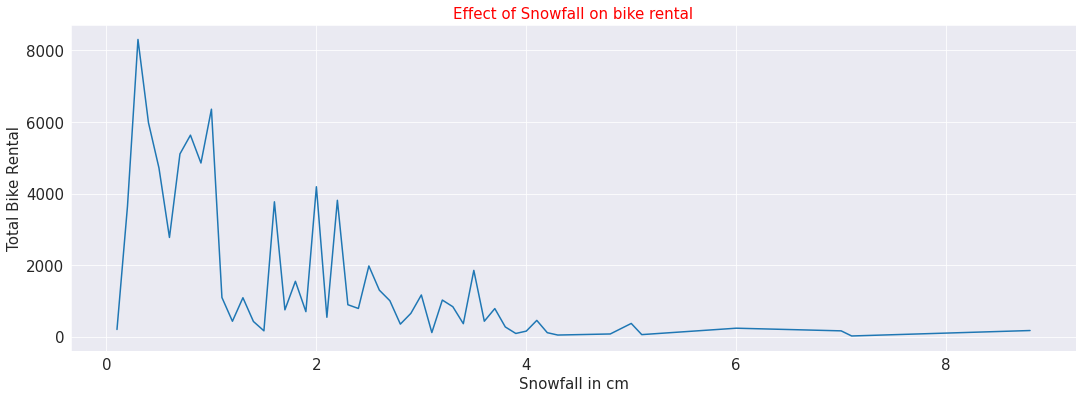

In [19]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=snowfall_analysis[1:] )
plt.xlabel('Snowfall in cm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Snowfall on bike rental',color='r', fontsize=15)

In [20]:
rainfall_analysis=df.groupby(['Rainfall(mm)'])['Rented Bike Count'].sum().reset_index()
rainfall_analysis.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


We are excluding the data at no Rainfall cause similar reason as no Snowfall day.

Text(0.5, 1.0, 'Effect of Rainfall on bike rental')

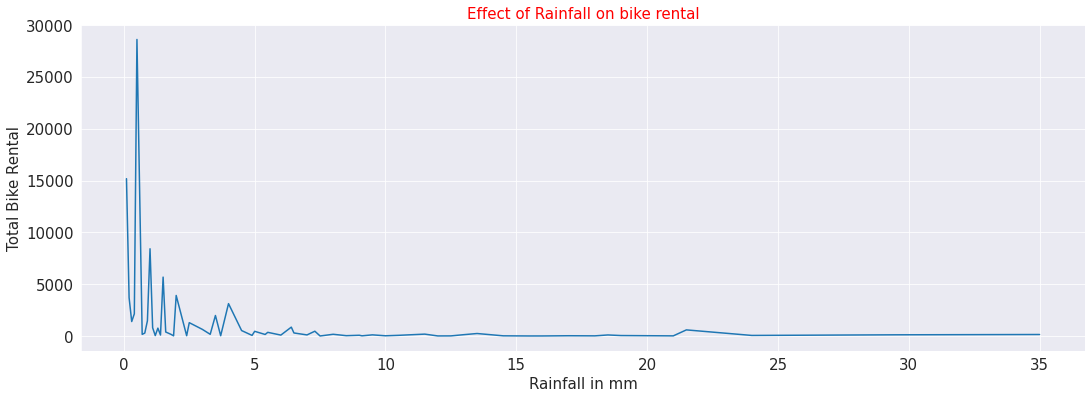

In [21]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=rainfall_analysis[1:] )
plt.xlabel('Rainfall in mm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Rainfall on bike rental',color='r', fontsize=15)

At No Rainfall and No Snowfall day demand is as expected is Maximum.

There is slight demand for bikes when Snowfall is less than 4cm and almost no demand after that.

In case of Rainfall, we can see when there is more rain than 5mm there is almost no demand for Bikes.

## Effect of Temprature on Bike Rental.

In [22]:
Temperature_analysis=df.groupby(['Temperature(°C)'])['Rented Bike Count'].sum().reset_index()
Temperature_analysis.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


Text(0.5, 1.0, 'Effect of Temperature on bike rental')

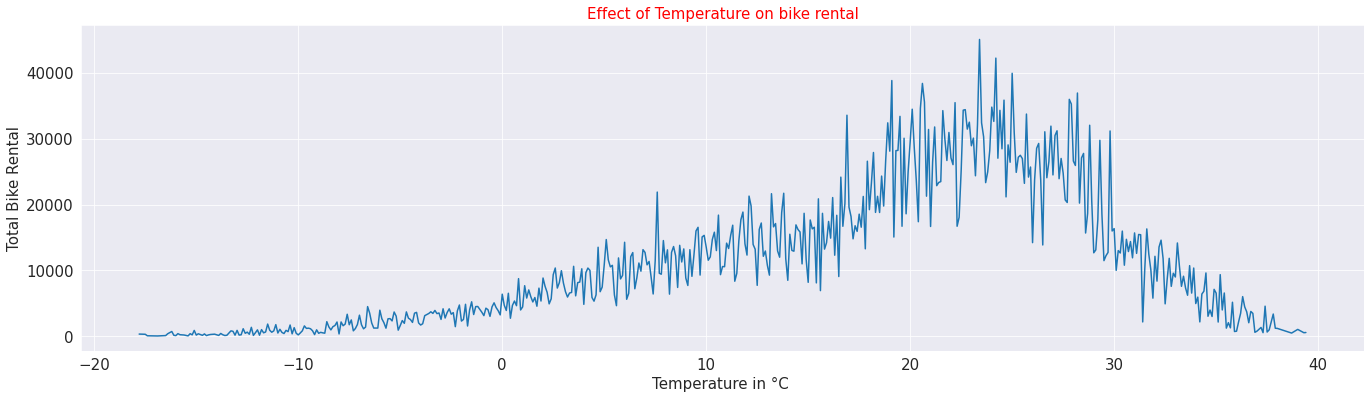

In [23]:
plt.figure(figsize=(23,6))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=Temperature_analysis )
plt.xlabel('Temperature in °C ')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Temperature on bike rental',color='r', fontsize=15)

We can see the Bike rental sum is somewhat normally distributed about Temperature 23°C, if we neglect outliers.

## Finding the Monthwise Trend in Bike Rentals.

In [24]:
df['Date'] = df['Date'].apply(lambda x:  dt.datetime.strptime(x,"%d/%m/%Y"))      #Changing the datatype for simplicity and calculations purpose.

In [25]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year

In [26]:
df['month_and_year']=df['Date'].dt.strftime('%m-%Y')

In [27]:
monthwise_bike_count_analysis=df.groupby(['month_and_year'])['Rented Bike Count'].sum().reset_index()
monthwise_bike_count_analysis.head()

,month_and_year,Rented Bike Count
0,01-2018,150006
1,02-2018,151833
2,03-2018,380594
3,04-2018,524227
4,05-2018,707088


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

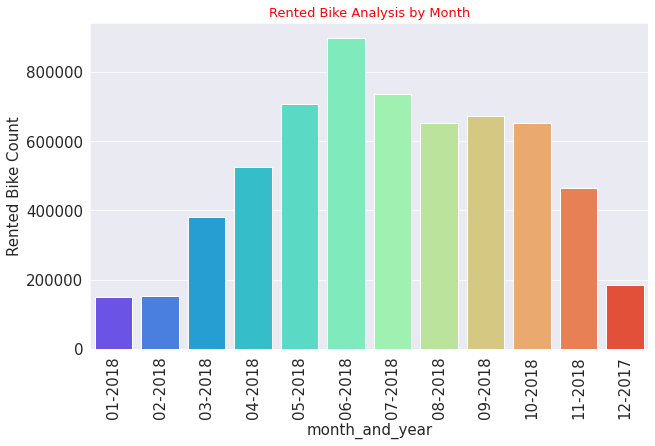

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='month_and_year',y='Rented Bike Count',data=monthwise_bike_count_analysis,palette='rainbow')
plt.title('Rented Bike Analysis by Month',color='r', fontsize=13)
plt.xticks(rotation=90)

The damand of bikes from April to November is maximum.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

As we can see there are few features which we want in category type datatype and they are presently in int or float. Because those features have categories as a numbers.

In [30]:
# changing the data types of few columns
columns=['Hour','Day','Month','Year','month_and_year']
for i in columns:
  df[i]=df[i].astype('category')

In [31]:
num_columns=list(df.select_dtypes(['int64','float64']))
num_features=pd.Index(num_columns)
num_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [32]:
import scipy.stats as stat
import pylab

In [33]:
def qqplot(df,features):      #Creating a function for checking the normality of features.
  '''
  This function takes dataframe and a feature as an input and returns distribution and probability plot as an output.
  '''
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(features)
  sns.distplot(df[features])
  plt.subplot(1,2,2)
  plt.title(features)
  stat.probplot(df[features],dist='norm',plot=pylab)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


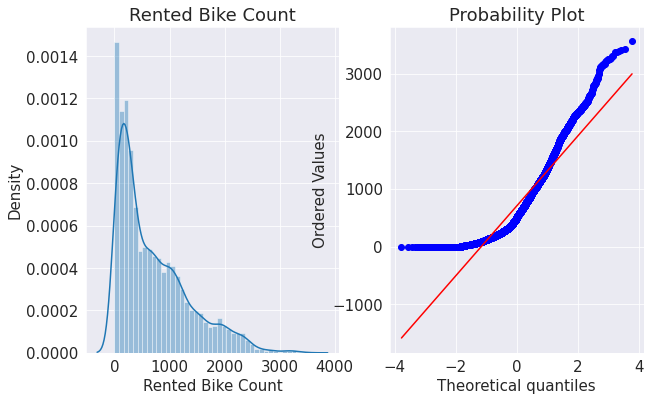

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


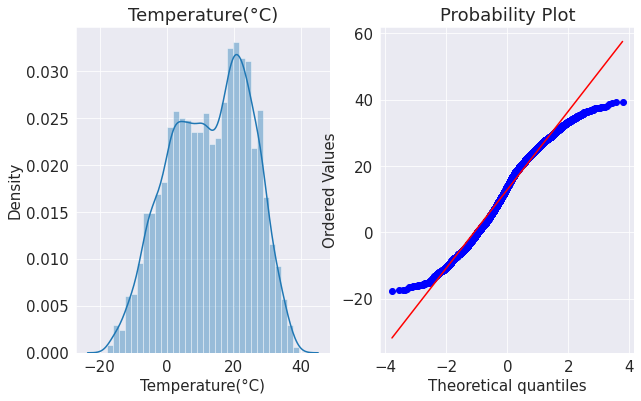

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


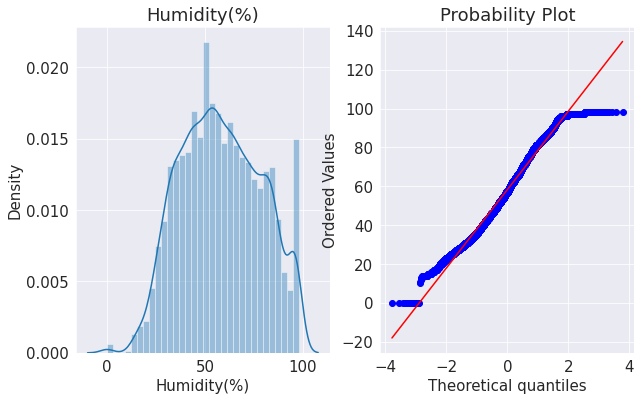

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


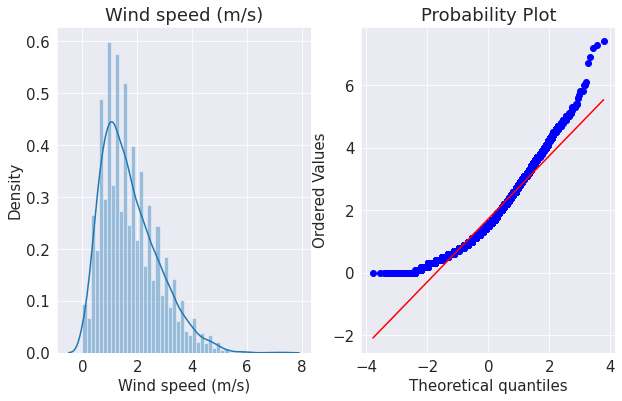

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


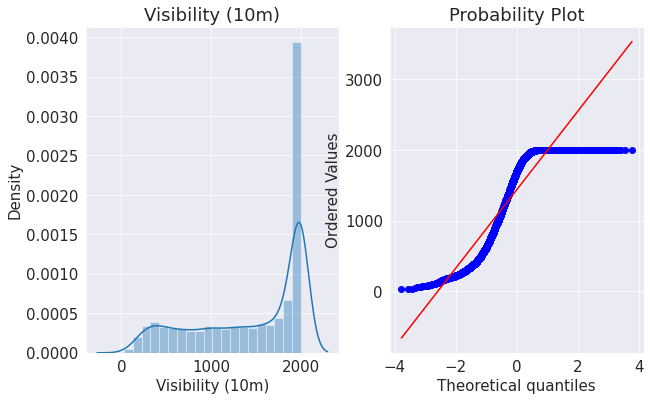

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


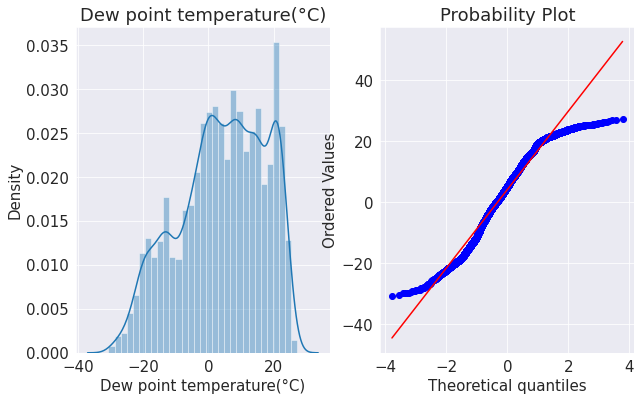

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


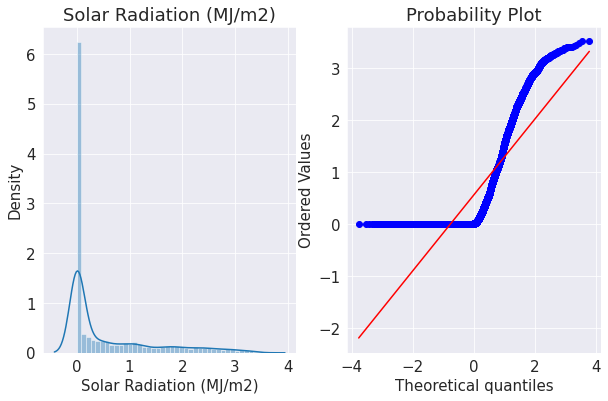

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


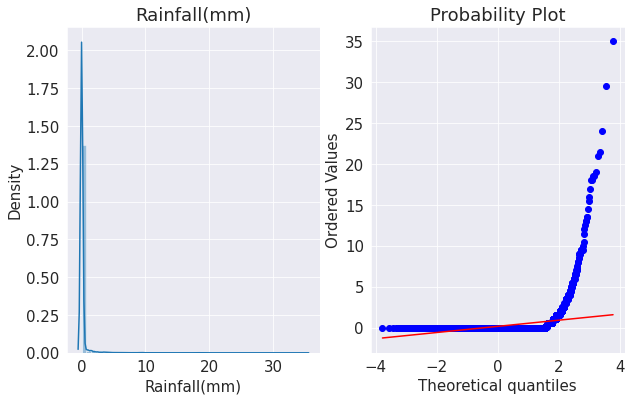

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


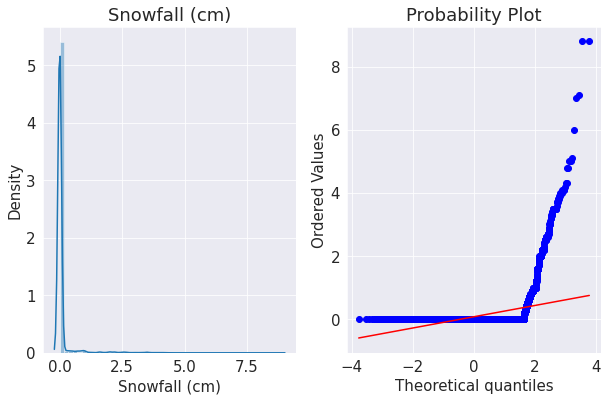

In [34]:
for i in list(df.describe().columns):    #Using for loop for saving the time purpose.
  qqplot(df,i)

**Insights**

Rented Bike Count, Tempearature, Humidity are somewhat Noramlly Distribution.

windspeed, Visibility, snowfall, solar radiation need to be normalised as they either Positively or Negetively skewed.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    '''
    This function will give the the VIF of required features.
    '''
    # Calculating VIF
    vif = pd.DataFrame()       #creating empty dataframe
    vif["variables"] = X.columns  #getting new columns and all coumn names from dataframe
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      #calculating vif variance_inflation_factor requires ndarray and index as an input

    return(vif)

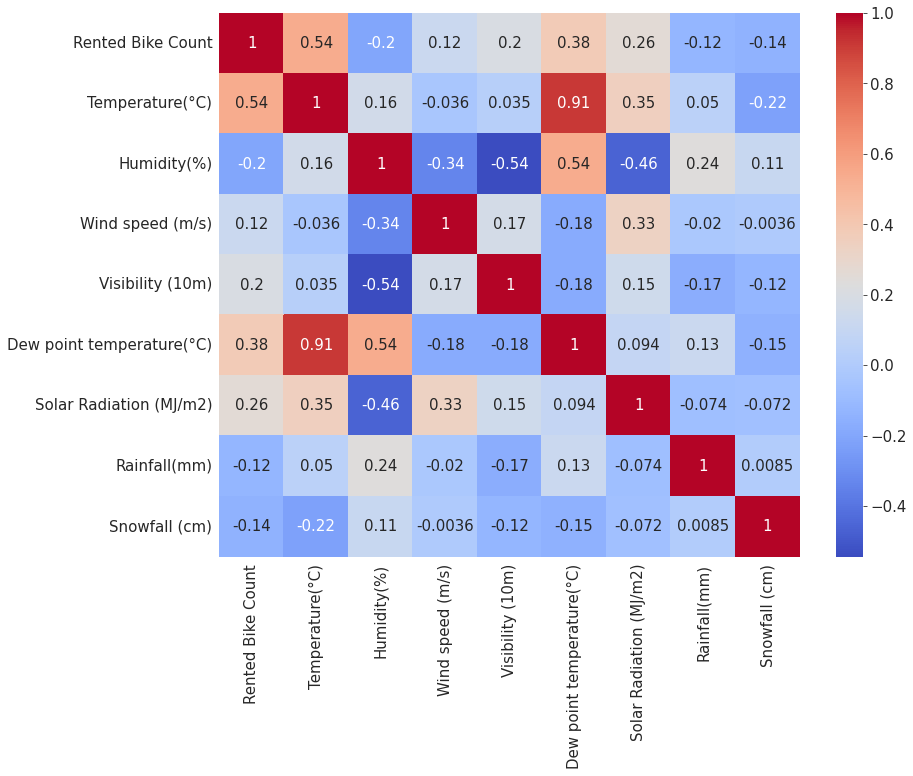

In [36]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [37]:
# Dew point Temparature is highly co-realted to Temperature, hence dropping it and extra column that we created month_and_year.
df=df.drop(columns=['Dew point temperature(°C)','month_and_year','Date','Day','Year'],axis=1)

In [38]:
calc_vif(df[[i for i in (df.describe().columns)]])                  #We only calculate VIF for Numerical features hence .describe()

,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


**As VIF is less than 5 for every feature we dont have any multi colinear features.**

# Data Preparation 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 7

## Outlier Detection

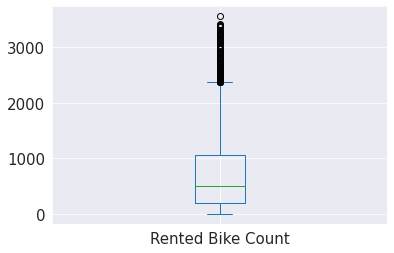

In [40]:
df['Rented Bike Count'].plot(kind='box')

As we can see there are many outliers in our output column. We need to replace with either mean or median or fancy imputer like knn.

In [41]:
# We will create a function to give Upper and Lower limit using IQR
def outlier_limits(col):
  '''
  This Function will provide Upper and lower Limit values of any Numeric Column using IQR
  '''
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [42]:
Upper_limit,Lower_limit=outlier_limits(df['Rented Bike Count'])

In [43]:
df[(df['Rented Bike Count'] < Lower_limit)|(df['Rented Bike Count'] > Upper_limit)]['Rented Bike Count'].count()

158

There are 158 Outliers in our target variable. We will first replace them with NAN and then will impute thiose values with KNN. 

In [44]:
df['Rented Bike Count']=np.where((df['Rented Bike Count'] < Lower_limit)|(df['Rented Bike Count'] > Upper_limit),np.nan,df['Rented Bike Count'])

In [45]:
df['Rented Bike Count'].isnull().sum()

158

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8602 non-null   float64 
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(3)
memory usage: 7

## Label Encoding

In [47]:
df=pd.get_dummies(df,columns=['Hour','Seasons','Holiday','Month','Functioning Day'],drop_first=True)

## Imputation of NAN values with KNN

In [48]:
!pip install fancyimpute
from fancyimpute import KNN       #Importing KNN library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 11.9 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=d9bee60b3d5894c4b6fc5280d84a8f993fb66b910e5dc6c5891a0780895c41c4
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=54799b4dd78926fdd366f1d646adf1f94589403d87de651533b798c24ae51a37
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [49]:
knn= KNN()

In [50]:
df.iloc[:,:]=knn.fit_transform(df)

Imputing row 1/8760 with 0 missing, elapsed time: 37.742
Imputing row 101/8760 with 0 missing, elapsed time: 37.743
Imputing row 201/8760 with 0 missing, elapsed time: 37.744
Imputing row 301/8760 with 0 missing, elapsed time: 37.744
Imputing row 401/8760 with 0 missing, elapsed time: 37.744
Imputing row 501/8760 with 0 missing, elapsed time: 37.744
Imputing row 601/8760 with 0 missing, elapsed time: 37.745
Imputing row 701/8760 with 0 missing, elapsed time: 37.746
Imputing row 801/8760 with 0 missing, elapsed time: 37.747
Imputing row 901/8760 with 0 missing, elapsed time: 37.747
Imputing row 1001/8760 with 0 missing, elapsed time: 37.747
Imputing row 1101/8760 with 0 missing, elapsed time: 37.748
Imputing row 1201/8760 with 0 missing, elapsed time: 37.748
Imputing row 1301/8760 with 0 missing, elapsed time: 37.749
Imputing row 1401/8760 with 0 missing, elapsed time: 37.749
Imputing row 1501/8760 with 0 missing, elapsed time: 37.749
Imputing row 1601/8760 with 0 missing, elapsed time:

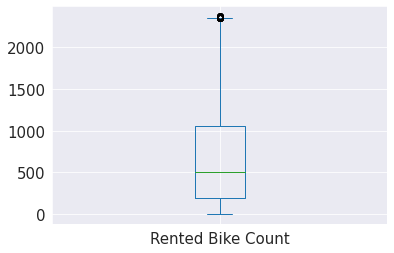

In [51]:
df['Rented Bike Count'].plot(kind='box')

We can see that most of the outliers have been replaced with imputed ones. Still there are few outliers but they won't be trouble to our model much.

## Distribution of target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


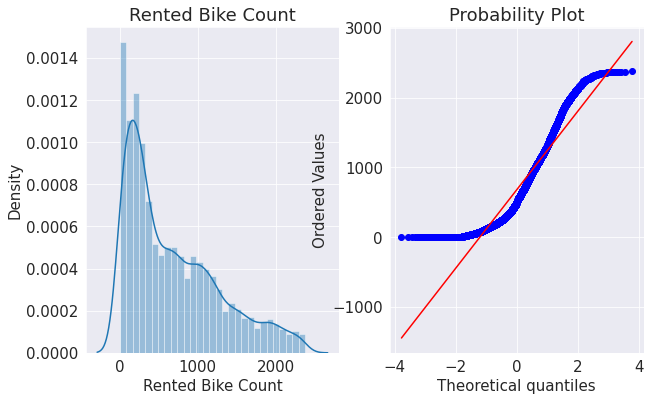

In [52]:
qqplot(df,'Rented Bike Count')

In [53]:
temp_df=df.copy()  #temp df

In [54]:
temp_df['Rented Bike Count']=np.sqrt(temp_df['Rented Bike Count'])

In [55]:
temp_df['Rented Bike Count']

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


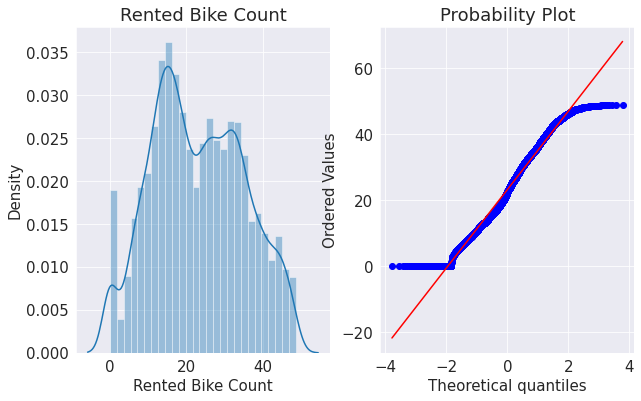

In [56]:
qqplot(temp_df,'Rented Bike Count')

This form is better than the previous, which we will use in ML models.

As  Visibility, Rainfall, Snowfall and Solar Radiation features data is not getting normalised, we are converting that data into categorical feature,

In [57]:
df['Visibility']=df['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
df['Rainfall']=df['Rainfall(mm)'].apply(lambda x:1 if x>=0.15 else 0)
df['Snowfall']=df['Snowfall (cm)'].apply(lambda x:1 if x>=0.1 else 0)
df['Solar_Radiation']=df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.6 else 0)
#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
df.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)'],axis=1,inplace=True)

In [68]:
temp_df=df.copy() #Taking the copy of our final dataframe, we will use further in the conclusion part.

# Let's start to build ML models.

In [69]:
features=df.drop(['Rented Bike Count'],axis=1)

In [70]:
X = features
y= np.sqrt(df[['Rented Bike Count']])

In [71]:
y.head()

,Rented Bike Count
0,15.937377
1,14.282857
2,13.152946
3,10.344080
4,8.831761


Using train_test_split for splitting the data into test and train sets. 

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


Using MinMaxScaler for standerdizing the data.

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [74]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [75]:
X_test

array([[0.49647887, 0.74489796, 0.17567568, ..., 0.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.13513514, ..., 0.        , 0.        ,
        0.        ],
       [0.37147887, 0.66326531, 0.58108108, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.87676056, 0.35714286, 0.24324324, ..., 0.        , 0.        ,
        1.        ],
       [0.5528169 , 0.51020408, 0.55405405, ..., 0.        , 0.        ,
        1.        ],
       [0.80633803, 0.43877551, 0.21621622, ..., 0.        , 0.        ,
        1.        ]])

## Implementing our first model Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression().fit(X_train, y_train)

In [77]:
regression.score(X_train,y_train)

0.7943249100371965

In [78]:
X_test

array([[0.49647887, 0.74489796, 0.17567568, ..., 0.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.13513514, ..., 0.        , 0.        ,
        0.        ],
       [0.37147887, 0.66326531, 0.58108108, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.87676056, 0.35714286, 0.24324324, ..., 0.        , 0.        ,
        1.        ],
       [0.5528169 , 0.51020408, 0.55405405, ..., 0.        , 0.        ,
        1.        ],
       [0.80633803, 0.43877551, 0.21621622, ..., 0.        , 0.        ,
        1.        ]])

In [79]:
regression.coef_

array([[ 2.31809274e+01, -9.29460269e+00, -5.43072605e-01,
        -2.51410976e+00, -5.36019690e+00, -7.13508983e+00,
        -1.01897987e+01, -9.62103272e+00, -4.39489318e+00,
         1.56095165e+00,  6.98260092e+00,  1.29618185e+00,
        -3.20753535e+00, -2.97848623e+00, -1.64669573e+00,
        -1.97939722e+00, -1.82186276e+00, -6.99553759e-01,
         9.34217760e-01,  4.39785030e+00,  6.85785890e+00,
         6.36851877e+00,  5.49218788e+00,  6.11153675e+00,
         4.96346092e+00,  1.25861876e+00,  1.48431516e+13,
         1.90124466e+13,  8.57697250e+12,  2.96835006e+00,
        -3.51657465e-01, -6.26617915e+12, -6.26617915e+12,
        -6.26617915e+12, -1.04354741e+13, -1.04354741e+13,
        -1.04354741e+13,  8.57697250e+12,  8.57697250e+12,
         8.57697250e+12,  2.02006774e+00,  2.81668423e+01,
         8.63969102e-02, -1.34776854e+01,  2.25642518e-01,
         1.62525050e+00]])

In [80]:
y_pred_train=regression.predict(X_train)


In [81]:
y_pred_test=regression.predict(X_test)

LR train set Evaluation Metrics




In [82]:
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score

In [83]:
LR_MSE=mean_squared_error((y_train),(y_pred_train))
print('MSE of Linear Regression Model is',LR_MSE)
LR_r2= r2_score(y_train, y_pred_train)
print('R2 score is',LR_r2)
LR_Adjusted_R2=(1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',LR_Adjusted_R2)

MSE of Linear Regression Model is 29.408870669652472
R2 score is 0.7943249100371965
Adjusted_Lasso_r2_score is 0.7928744954828061


In [84]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Linear regression ',
       'MSE':round((LR_MSE),3),
       'R2_score':round((LR_r2),3),
       'Adjusted R2':round((LR_Adjusted_R2 ),3)
       }
train_df=pd.DataFrame(train_model_metrics_dict,index=[1])

LR test set Evaluation Metrics

In [85]:
LR_MSE=mean_squared_error((y_test),(y_pred_test))
print('MSE of Linear Regression Model is',LR_MSE)
LR_r2= r2_score(y_test, y_pred_test)
print('R2 score is',LR_r2)
LR_Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',LR_Adjusted_R2)

MSE of Linear Regression Model is 29.75762529594038
R2 score is 0.7960757746161014
Adjusted_Lasso_r2_score is 0.7916984930632972


In [86]:
# storing the test set metrics value in a dataframe for later comparison
Test_model_metrics_dict={'Model':'Linear regression ',
       'MSE':round((LR_MSE),3),
       'R2_score':round((LR_r2),3),
       'Adjusted R2':round((LR_Adjusted_R2 ),3)
       }
test_df=pd.DataFrame(Test_model_metrics_dict,index=[1])

## Implementing Lasso Regression


In [87]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.1,max_iter=1000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [88]:
lasso.score(X_train,y_train)

0.7498857356406082

In [89]:
lasso.coef_

array([ 17.69670423,  -8.13704424,   0.        ,  -0.77779449,
        -3.74952756,  -5.56859431,  -8.44857472,  -7.84594768,
        -2.85944045,   0.        ,   4.17590381,   0.        ,
        -0.23609569,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   2.71054369,
         4.45668837,   3.91668586,   2.55202805,   3.39034489,
         2.13351471,   0.        ,  -0.        ,  -0.        ,
        -7.5591863 ,   0.49006909,  -0.        ,  -2.52996667,
        -0.        ,   0.48901148,   2.00489655,  -0.        ,
        -0.88745772,   0.        ,   1.29109283,   0.        ,
         0.        ,  23.84722042,   0.15157104, -12.15978269,
        -0.        ,   0.48659312])

In [90]:
lasso_y_pred_train=lasso.predict(X_train)
lasso_y_pred_test=lasso.predict(X_test)


Lasso Train Set Evaluation Matrix.

In [91]:
Lasso_MSE=mean_squared_error(y_train,lasso_y_pred_train)
print('Lasso MSE is',Lasso_MSE)
Lasso_r2_score=r2_score(y_train,lasso_y_pred_train)
print('Lasso_r2_score is',Lasso_r2_score)
Lasso_Adjusted_R2=(1-(1-r2_score((y_train), (lasso_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',Lasso_Adjusted_R2)

Lasso MSE is 35.76309632105124
Lasso_r2_score is 0.7498857356406082
Adjusted_Lasso_r2_score is 0.7481219373636603


In [92]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Lasso regression ',
       'MSE':round((Lasso_MSE),3),
       'R2_score':round((Lasso_r2_score),3),
       'Adjusted R2':round((Lasso_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

In [93]:
train_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.409,0.794,0.793
1,Lasso regression,35.763,0.750,0.748


Lasso Test Set Evaluation Matrix.

In [94]:
Lasso_MSE=mean_squared_error(y_test,lasso_y_pred_test)
print(Lasso_MSE)
Lasso_r2_score=r2_score(y_test,lasso_y_pred_test)
print('Lasso_r2_score is',Lasso_r2_score)
Lasso_Adjusted_R2=(1-(1-r2_score((y_test), (lasso_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',Lasso_Adjusted_R2)

35.55127487525866
Lasso_r2_score is 0.7563728248390771
Adjusted_Lasso_r2_score is 0.751143310113271


In [95]:
# storing the train set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Lasso regression ',
       'MSE':round((Lasso_MSE),3),
       'R2_score':round((Lasso_r2_score),3),
       'Adjusted R2':round((Lasso_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

In [96]:
test_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.758,0.796,0.792
1,Lasso regression,35.551,0.756,0.751


## Implementing Ridge Regression

In [97]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.1,max_iter=1000)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=1000)

In [98]:
ridge.score(X_train,y_train)

0.7943247262524834

In [99]:
ridge_y_pred_train=ridge.predict(X_train)
ridge_y_pred_test=ridge.predict(X_test)

Ridge Train set Evaluation Metrics

In [100]:
ridge_MSE=mean_squared_error(y_train,ridge_y_pred_train)
print('ridge_MSE is ',ridge_MSE)

ridge_r2_score=r2_score(y_train,ridge_y_pred_train)
print('ridge_r2_score is',ridge_r2_score)

ridge_Adjusted_R2=(1-(1-r2_score((y_train), (ridge_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Ridge_Adjusted_R2 is',ridge_Adjusted_R2)

ridge_MSE is  29.408896948483125
ridge_r2_score is 0.7943247262524834
Ridge_Adjusted_R2 is 0.7928743104020487


In [101]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Ridge regression ',
       'MSE':round((ridge_MSE),3),
       'R2_score':round((ridge_r2_score),3),
       'Adjusted R2':round((ridge_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Ridge Test Set Evaluation Matrix

In [102]:
ridge_MSE=mean_squared_error(y_test,ridge_y_pred_test)
print('ridge_MSE is ',ridge_MSE)

ridge_r2_score=r2_score(y_test,ridge_y_pred_test)
print('ridge_r2_score is',ridge_r2_score)

Ridge_Adjusted_R2=(1-(1-r2_score((y_test), (ridge_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Ridge_Adjusted_R2 is',Ridge_Adjusted_R2)

ridge_MSE is  29.757304165808325
ridge_r2_score is 0.7960779752693046
Ridge_Adjusted_R2 is 0.79170074095404


In [103]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Ridge regression ',
       'MSE':round((ridge_MSE),3),
       'R2_score':round((ridge_r2_score),3),
       'Adjusted R2':round((ridge_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

In [104]:
test_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.758,0.796,0.792
1,Lasso regression,35.551,0.756,0.751
2,Ridge regression,29.757,0.796,0.793


## Implementing Elastic Net Regression

In [105]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=.1,max_iter=3000,l1_ratio=.5)

In [106]:
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.1, max_iter=3000)

In [107]:
elastic_net.score(X_train,y_train)

0.5945444016492081

In [108]:
elastic_net_y_pred_train=elastic_net.predict(X_train)
elastic_net_y_pred_test=elastic_net.predict(X_test)

Elastic Net Train Set Evaluation Metrics

In [109]:
elastic_net_MSE=mean_squared_error(y_train,elastic_net_y_pred_train)
print('elastic_net_MSE is ',elastic_net_MSE)

elastic_net_r2_score=r2_score(y_train,elastic_net_y_pred_train)
print('elastic_net_r2_score is',elastic_net_r2_score)

elastic_net_Adjusted_R2=(1-(1-r2_score((y_train), (elastic_net_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('elastic_net_Adjusted_R2 is',elastic_net_Adjusted_R2)

elastic_net_MSE is  57.97489261505349
elastic_net_r2_score is 0.5945444016492081
elastic_net_Adjusted_R2 is 0.5916851409525752


In [110]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Elastic regression ',
       'MSE':round((elastic_net_MSE),3),
       'R2_score':round((elastic_net_r2_score),3),
       'Adjusted R2':round((elastic_net_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Elastic Net Test Set Evaluation Matrix.

In [111]:
elastic_net_MSE=mean_squared_error(y_test,elastic_net_y_pred_test)
print('elastic_net_MSE is ',elastic_net_MSE)

elastic_net_r2_score=r2_score(y_test,elastic_net_y_pred_test)
print('elastic_net_r2_score is',elastic_net_r2_score)

elastic_net_Adjusted_R2=(1-(1-r2_score((y_test), (elastic_net_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('elastic_net_Adjusted_R2 is',elastic_net_Adjusted_R2)

elastic_net_MSE is  60.139409319164734
elastic_net_r2_score is 0.5878742897495602
elastic_net_Adjusted_R2 is 0.5790279142612167


In [112]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Elastic regression ',
       'MSE':round((elastic_net_MSE),3),
       'R2_score':round((elastic_net_r2_score),3),
       'Adjusted R2':round((elastic_net_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

## Implementing Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features=25,max_leaf_nodes=20)

In [114]:
decision_tree_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=25,
                      max_leaf_nodes=20)

In [115]:
decision_tree_reg.score(X_train,y_train)

0.716832035187328

In [116]:
decision_tree_reg_y_pred_train=decision_tree_reg.predict(X_train)
decision_tree_reg_y_pred_test=decision_tree_reg.predict(X_test)

Decision Tree Train Set Evaluation Metrics



In [117]:
decision_tree_reg_MSE=mean_squared_error(y_train,decision_tree_reg_y_pred_train)
print('decision_tree_reg_MSE is ',decision_tree_reg_MSE)

decision_tree_reg_r2_score=r2_score(y_train,decision_tree_reg_y_pred_train)
print('decision_tree_reg_r2_score is',decision_tree_reg_r2_score)

decision_tree_reg_Adjusted_R2=(1-(1-r2_score((y_train), (decision_tree_reg_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_reg_Adjusted_R2)

decision_tree_reg_MSE is  40.489346845408626
decision_tree_reg_r2_score is 0.716832035187328
decision_tree_reg_Adjusted_R2 is 0.7148351432079653


In [118]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Decision Tree regression ',
       'MSE':round((decision_tree_reg_MSE),3),
       'R2_score':round((decision_tree_reg_r2_score),3),
       'Adjusted R2':round((decision_tree_reg_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Decision Tree Test Set Evaluation Metrics

In [119]:
decision_tree_reg_MSE=mean_squared_error(y_test,decision_tree_reg_y_pred_test)
print('decision_tree_reg_MSE is ',decision_tree_reg_MSE)

decision_tree_reg_r2_score=r2_score(y_test,decision_tree_reg_y_pred_test)
print('decision_tree_reg_r2_score is',decision_tree_reg_r2_score)

decision_tree_Adjusted_R2=(1-(1-r2_score((y_test), (decision_tree_reg_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_Adjusted_R2)

decision_tree_reg_MSE is  40.87200149887905
decision_tree_reg_r2_score is 0.7199107400990928
decision_tree_reg_Adjusted_R2 is 0.7138985581320179


In [120]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Decision Tree regression ',
       'MSE':round((decision_tree_reg_MSE),3),
       'R2_score':round((decision_tree_reg_r2_score),3),
       'Adjusted R2':round((decision_tree_reg_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

As r2_score for Decision Tree is less. Lets increase it with **Hyper Parameter Tunning** and **Cross Validation**

In [121]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [122]:
from sklearn.model_selection import GridSearchCV
Hyper_tun_decision_tree=DecisionTreeRegressor()
tunning_decision_reg=GridSearchCV(Hyper_tun_decision_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tunning_decision_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12, 15, 20, 25, 50,
                                       100],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 70, 100,
                                            140, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]},
             scoring='neg_mean_squared_error')

In [123]:
tunning_decision_reg.best_params_    #getting the best hyper parameters values.

{'max_depth': 50, 'max_leaf_nodes': 150, 'min_samples_leaf': 5}

In [124]:
y_train_pred=tunning_decision_reg.predict(X_train)
y_test_pred=tunning_decision_reg.predict(X_test)

Train Evaluation Metrics of Hyper tunned Decision Tree Model

In [125]:
decision_tree_tunn_MSE=mean_squared_error(y_train,y_pred_train)
print('decision_tree_reg_MSE is ',decision_tree_tunn_MSE)

decision_tree_tunn_r2_score=r2_score(y_train,y_pred_train)
print('decision_tree_reg_r2_score is',decision_tree_tunn_r2_score)

decision_tree_tunn_Adjusted_R2=(1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_tunn_Adjusted_R2)

decision_tree_reg_MSE is  29.408870669652472
decision_tree_reg_r2_score is 0.7943249100371965
decision_tree_reg_Adjusted_R2 is 0.7928744954828061


In [126]:
# storing the test set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Huper Tunned DT ',
       'MSE':round((decision_tree_tunn_MSE),3),
       'R2_score':round((decision_tree_tunn_r2_score),3),
       'Adjusted R2':round((decision_tree_tunn_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Test Evaluation Metrics of Hyper tunned Decision Tree Model

In [127]:
decision_tree_tunn_MSE=mean_squared_error(y_test,y_pred_test)
print('decision_tree_reg_MSE is ',decision_tree_tunn_MSE)

decision_tree_tunn_r2_score=r2_score(y_test,y_pred_test)
print('decision_tree_reg_r2_score is',decision_tree_tunn_r2_score)

decision_tree_tunn_Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_tunn_Adjusted_R2)

decision_tree_reg_MSE is  29.75762529594038
decision_tree_reg_r2_score is 0.7960757746161014
decision_tree_reg_Adjusted_R2 is 0.7916984930632972


In [128]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Huper Tunned DT ',
       'MSE':round((decision_tree_tunn_MSE),3),
       'R2_score':round((decision_tree_tunn_r2_score),3),
       'Adjusted R2':round((decision_tree_tunn_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

## Implementing Random Forest Regression

In [129]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor=RandomForestRegressor(criterion='mse')

In [130]:
RF_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [131]:
RF_regressor.score(X_train,y_train)

0.9828060405563481

In [132]:
RF_regressor_y_pred_train=RF_regressor.predict(X_train)
RF_regressor_y_pred_test=RF_regressor.predict(X_test)

Random Forest Train Set Evaluation Metrics

In [133]:
RF_regressor_MSE=mean_squared_error(y_train,RF_regressor_y_pred_train)
print('RF_regressor_reg_MSE is ',RF_regressor_MSE)

RF_regressor_r2_score=r2_score(y_train,RF_regressor_y_pred_train)
print('RF_regressor_r2_score is',RF_regressor_r2_score)

RF_regressor_Adjusted_R2=(1-(1-r2_score((y_train), (RF_regressor_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('RF_regressor_Adjusted_R2 is',RF_regressor_Adjusted_R2)

RF_regressor_reg_MSE is  2.4585132291375515
RF_regressor_r2_score is 0.9828060405563481
RF_regressor_Adjusted_R2 is 0.9826847892709875


In [134]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Random Forest regression ',
       'MSE':round((RF_regressor_MSE),3),
       'R2_score':round((RF_regressor_r2_score),3),
       'Adjusted R2':round((RF_regressor_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Random Forest Test Set Evaluation Matrix

In [135]:
RF_regressor_MSE=mean_squared_error(y_test,RF_regressor_y_pred_test)
print('RF_regressor_reg_MSE is ',RF_regressor_MSE)

RF_regressor_r2_score=r2_score(y_test,RF_regressor_y_pred_test)
print('RF_regressor_r2_score is',RF_regressor_r2_score)

RF_regressor_Adjusted_R2=(1-(1-r2_score((y_test), (RF_regressor_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('RF_regressor_Adjusted_R2 is',RF_regressor_Adjusted_R2)

RF_regressor_reg_MSE is  19.253699290863114
RF_regressor_r2_score is 0.8680574920002297
RF_regressor_Adjusted_R2 is 0.8652253149736364


In [136]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Random Forest regression ',
       'MSE':round((RF_regressor_MSE),3),
       'R2_score':round((RF_regressor_r2_score),3),
       'Adjusted R2':round((RF_regressor_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

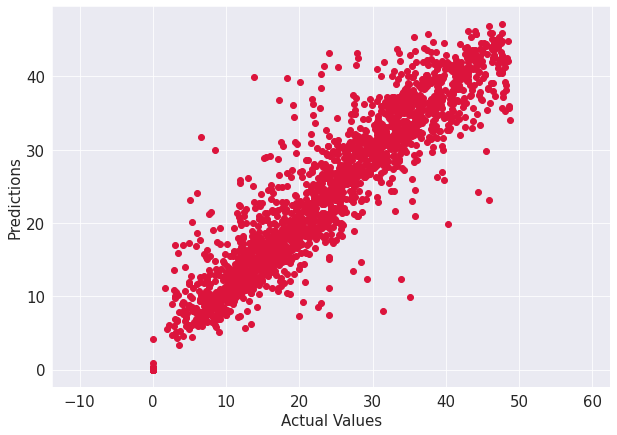

In [137]:
#plotting actual and predicted value
plt.figure(figsize=(10,7))
plt.scatter(y_test,RF_regressor_y_pred_test, c='crimson')  #creating a scatter plot of test set
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.rcParams.update({'font.size': 15})
plt.show()

## Implementing Gradient Boosting Regressor



In [138]:
from sklearn.ensemble import GradientBoostingRegressor
GB_boost_regressor=GradientBoostingRegressor()

In [139]:
GB_boost_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [140]:
GB_boost_regressor.score(X_train,y_train)

0.8510929472714518

In [141]:
GB_boost_regressor_y_pred_train=GB_boost_regressor.predict(X_train)
GB_boost_regressor_y_pred_test=GB_boost_regressor.predict(X_test)

Gradient Boost Regressor Train Set Mertrics

In [142]:
GB_boost_regressor_MSE=mean_squared_error(y_train,GB_boost_regressor_y_pred_train)
print('GB_boost_regressor_MSE is ',GB_boost_regressor_MSE)

GB_boost_regressor_r2_score=r2_score(y_train,GB_boost_regressor_y_pred_train)
print('GB_boost_regressor_r2_score is',GB_boost_regressor_r2_score)

GB_boost_regressor_Adjusted_R2=(1-(1-r2_score((y_train), (GB_boost_regressor_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('GB_boost_regressor_Adjusted_R2 is',GB_boost_regressor_Adjusted_R2)

GB_boost_regressor_MSE is  21.291777513188283
GB_boost_regressor_r2_score is 0.8510929472714518
GB_boost_regressor_Adjusted_R2 is 0.8500428592098983


In [143]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Gradient Boost regression ',
       'MSE':round((GB_boost_regressor_MSE),3),
       'R2_score':round((GB_boost_regressor_r2_score),3),
       'Adjusted R2':round((GB_boost_regressor_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Gradient Boost Regressor Test Set Metrics

In [144]:
GB_boost_regressor_MSE=mean_squared_error(y_test,GB_boost_regressor_y_pred_test)
print('GB_boost_regressor_MSE is ',GB_boost_regressor_MSE)

GB_boost_regressor_r2_score=r2_score(y_test,GB_boost_regressor_y_pred_test)
print('GB_boost_regressor_r2_score is',GB_boost_regressor_r2_score)

GB_boost_regressor_Adjusted_R2=(1-(1-r2_score((y_test), (GB_boost_regressor_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('GB_boost_regressor_Adjusted_R2 is',GB_boost_regressor_Adjusted_R2)

GB_boost_regressor_MSE is  23.781785103895402
GB_boost_regressor_r2_score is 0.8370272473919544
GB_boost_regressor_Adjusted_R2 is 0.8335289988525377


In [145]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Gradient Boost regression ',
       'MSE':round((GB_boost_regressor_MSE),3),
       'R2_score':round((GB_boost_regressor_r2_score),3),
       'Adjusted R2':round((GB_boost_regressor_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

# Comparison of all Model's Evaluation Metrics

**Evaluation of all models TEST SET parameters.**





In [146]:
test_df    

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.758,0.796,0.792
1,Lasso regression,35.551,0.756,0.751
2,Ridge regression,29.757,0.796,0.793
3,Elastic regression,60.139,0.588,0.579
4,Decision Tree regression,40.872,0.720,0.715
5,Huper Tunned DT,29.758,0.796,0.792
6,Random Forest regression,19.254,0.868,0.865
7,Gradient Boost regression,23.782,0.837,0.834


**Evaluation of all models TRAIN SET parameters.**


In [147]:
train_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.409,0.794,0.793
1,Lasso regression,35.763,0.750,0.748
2,Ridge regression,29.409,0.794,0.793
3,Elastic regression,57.975,0.595,0.592
4,Decision Tree regression,40.489,0.717,0.715
5,Huper Tunned DT,29.409,0.794,0.793
6,Random Forest regression,2.459,0.983,0.983
7,Gradient Boost regression,21.292,0.851,0.850


Let's build interactive Bar plot to comapre all models.

In [148]:
def bar_plot(df1,df2,column):
  '''
  This funstion is used to compare the Evaluation metrics of both train and test sets of different models
  '''
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(str(('Train set ')+column))
  sns.barplot(x='Model', y=column, data=df1)
  plt.xticks(rotation=(90))
  plt.subplot(1,2,2)
  plt.title(str(('Test set ')+column))
  sns.barplot(x='Model', y=column, data=df2)
  plt.xticks(rotation=(90))
  plt.show()

In [149]:
metrics_list=list(train_df.columns)
metrics_list.remove('Model')

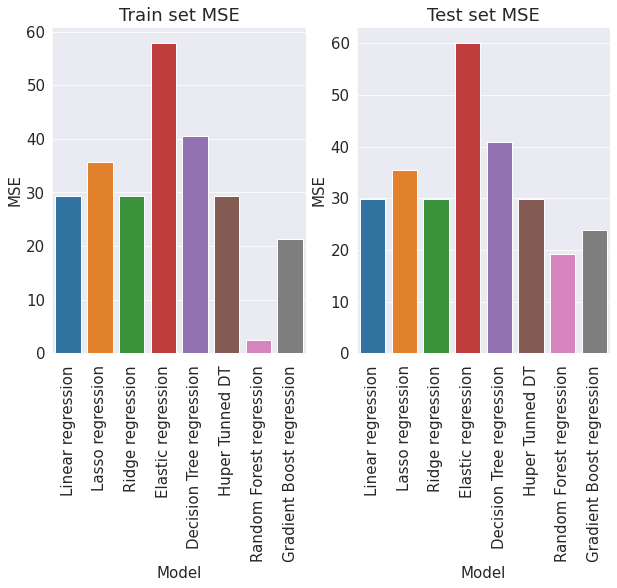

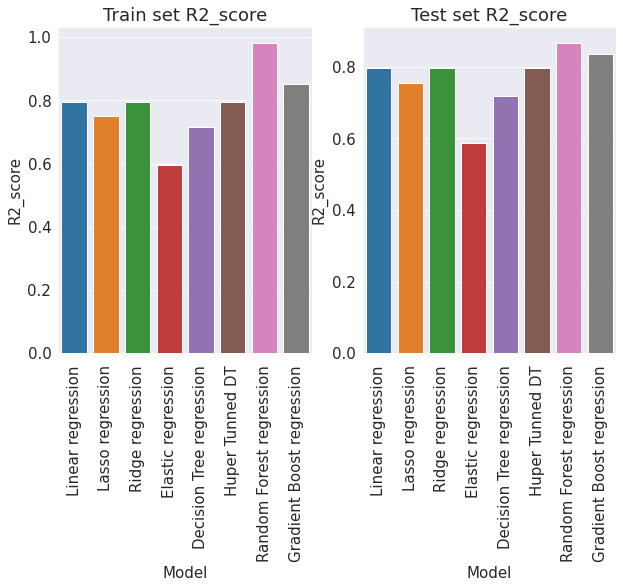

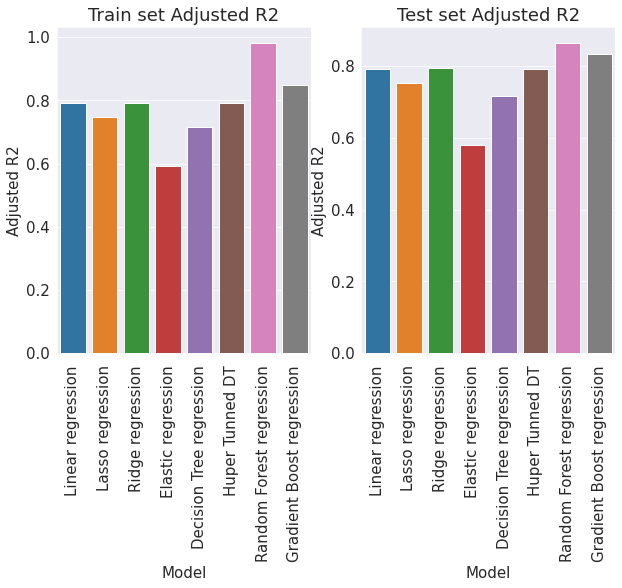

In [150]:
for i in metrics_list:
    bar_plot(train_df,test_df,i)

In [151]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the horizontal bar graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,15))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

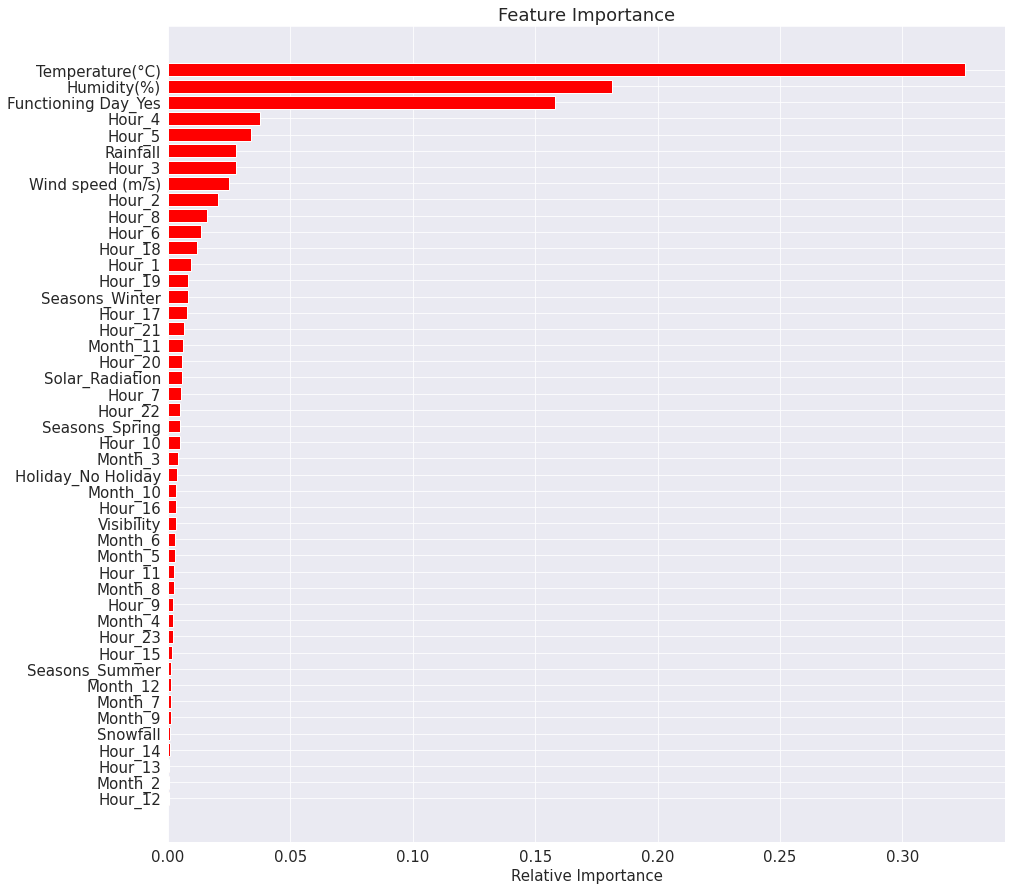

In [152]:
get_features_importance(RF_regressor,X)

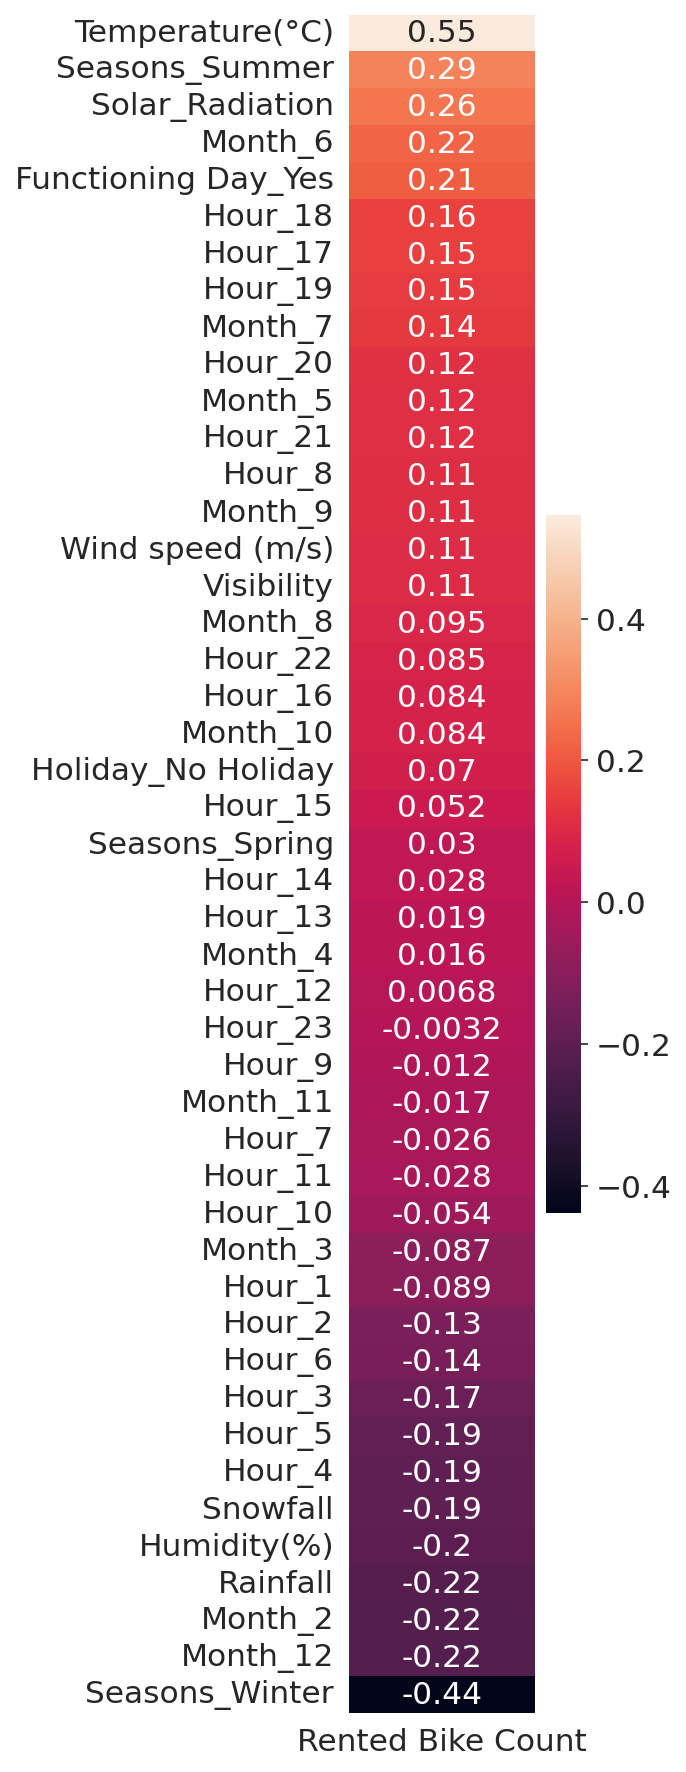

In [153]:
plt.figure(figsize=(2,15), dpi=150)
sns.heatmap(temp_df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

# Conclusion

In our analysis, first we did **EDA** on the dataset features. We found the impact of each feature on Bike Rent Count. We found the *seasonwise Bike Rent Count, Hourly Trend, Monthly Trend and Temperature wise rent count trend*.  As we were expecting the Bike Rent Count should be at highest at no Rainfall , no Snowfall and high Visibility, we got the same results in the EDA.



For deploying most of the ML models we want our features to be normally distributed. First, We found out that our target variable 'Bike Rent Count' has **158 outliers** with the help of IQR. Such outliers make high impact on our model learning. Hence we replaced them with NAN and **imputed those same ones with KNN**.   **Squared root transform** gave us the normal distribution of **our target variable.**



For the features **Rainfall, Snowfall, Solar Radiation and Visibility** getting the normal distribution was nearly impossible, beacause they either had greater positive or negative skew value. Fot those features we **converted them to Categorical features**. We replaced those observations either into 0 or 1.


Second IMP assumption of ML model is that we dont want any multicollinear features. we found out **Dew Point Temperature and Temperature were highly co-related.** As Temperature feature was making high impact on our target variable, we **dropped Dew Point Temperature** feature.  **Varience Inflation Factor** for our features were **below 5**. With **MinMaxScaler** we normalized our features.


Next we implemented **7 different ML models** such as Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, Decision Tree Regressor,
Random Forest Regressor and Gradient Boost Regressor. We also **used Hyper Tunning** and **Cross Validation** for getting better results in Decision Tree Regressor. We got the ***best results for Random Forest Regressor***. For **Training set r2_score is .98** and **Testing set .87 r2_score**, that means ***87% of the variation in the output variable is explained by the input variables***.


.



### With this help of Data Analysis and Deployment of our Model, Company can plan more accurately the correct resources at correct time. It will also help the company to make available the sufficient Bikes for better response of the customers.
